In [8]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
model = tf.keras.models.load_model('model/food_model.h5')

In [12]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (227, 227))
    img = img / 255.0 
    return img

def predict_image(image_path):
    img = preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    return prediction

def predicted_class_label(prediction):
    import pandas as pd
    csv_labels_path = 'ingredient_recipe.csv'
    df = pd.read_csv(csv_labels_path)
    
    predicted_class = np.argmax(prediction)
    
    return df['Title'][predicted_class] + ' ' + df['Ingredients'][predicted_class]

1/1 [==============================] - 0s 169ms/step
Chocolate Zucchini Cake ['2 1/4 cups sifted all purpose flour', '1/2 cup unsweetened cocoa powder', '1 teaspoon baking soda', '1 teaspoon salt', '1 3/4 cups sugar', '1/2 cup (1 stick) unsalted butter, room temperature', '1/2 cup vegetable oil', '2 large eggs', '1 teaspoon vanilla extract', '1/2 cup buttermilk', '2 cups grated unpeeled zucchini (about 2 1/2 medium)', '1 6-ounce package (about 1 cup) semisweet chocolate chips', '3/4 cup chopped walnuts']


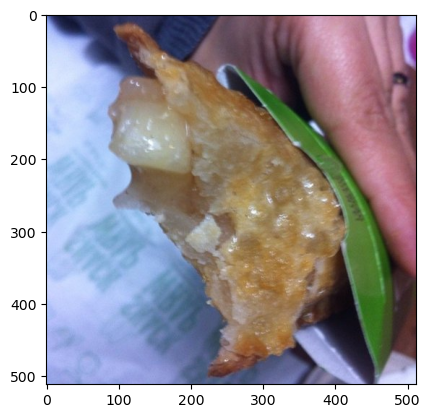

: 

In [13]:
image = 'dataset_test/ayran-201053.jpg'

prediction = predict_image(image)

predicted_class_label = predicted_class_label(prediction)

print(predicted_class_label)

img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()